In [62]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

https://codelabs.developers.google.com/codelabs/tensorflow-lab3-convolutions/#3

Using Convolutions


In [63]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.908):
      print("\nReached 90.8% accuracy so cancelling training!")
      self.model.stop_training = True


mnist = tf.keras.datasets.mnist

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5993 - accuracy: 0.9065
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.9370
Reached 90.8% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3178 - accuracy: 0.9371


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image sucessfully Downloaded:  Potato-nuggets.jpg


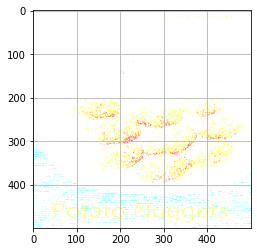

In [64]:

import requests # to get image from the web
import shutil # to save it locally

import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

## Set up the image URL and filename
image_url = "https://raw.githubusercontent.com/srinirama/Keras_Deep_Learning/master/Potato-nuggets.jpg"
filename = image_url.split("/")[-1]

# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
        
    print('Image sucessfully Downloaded: ',filename)
else:
    print('Image Couldn\'t be retreived')

img = image.load_img("Potato-nuggets.jpg", target_size=(500, 500))

x_img = image.img_to_array(img)

import cv2
import numpy as np
from scipy import misc



import matplotlib.pyplot as plt
plt.grid(True)
#plt.gray()
#plt.axis('off')
plt.imshow(x_img,cmap=plt.cm.binary)
plt.show()


In [65]:
i_transformed = np.copy(x_img)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


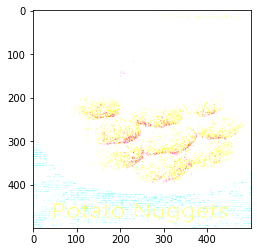

In [66]:

plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 



In [73]:
#First, we make a convolution matrix (or kernel) as a 3x3 array.
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

#Test fir 5x5 filter matrix
filter = [ [-1, -2, -1, -2, -1], [0, 0, 0, 0, 0], [1, 2, 1, 2, 1], [0, 0, 0, 0, 0], [1, 2, 1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 0.1

Now let's calculate the output pixels. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

That means the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [74]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (x_img[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (x_img[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (x_img[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (x_img[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (x_img[x, y] * filter[1][1])
      output_pixel = output_pixel + (x_img[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (x_img[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (x_img[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (x_img[x+1, y+1] * filter[2][2])
      print("output_pixel={}.  y= {}.  x={}. ".format(output_pixel,y,x) )
      output_pixel = output_pixel * weight
      if(output_pixel.all()<0):
        output_pixel=0
      if(output_pixel.all()>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

Streaming output truncated to the last 5000 lines.
output_pixel=[  3. -34.  15.].  y= 480.  x=488. 
output_pixel=[-27. -24.  -9.].  y= 481.  x=488. 
output_pixel=[-51. -52. -33.].  y= 482.  x=488. 
output_pixel=[1. 7. 6.].  y= 483.  x=488. 
output_pixel=[31. 38. 17.].  y= 484.  x=488. 
output_pixel=[ 4.  5. -3.].  y= 485.  x=488. 
output_pixel=[12. 22.  2.].  y= 486.  x=488. 
output_pixel=[-24. -25. -21.].  y= 487.  x=488. 
output_pixel=[16. 10. 29.].  y= 488.  x=488. 
output_pixel=[ 4. 12.  9.].  y= 489.  x=488. 
output_pixel=[-66. -70. -74.].  y= 490.  x=488. 
output_pixel=[-12. -14. -25.].  y= 491.  x=488. 
output_pixel=[28. 43. 46.].  y= 492.  x=488. 
output_pixel=[21. 19. 28.].  y= 493.  x=488. 
output_pixel=[-46. -68. -67.].  y= 494.  x=488. 
output_pixel=[-53. -54. -29.].  y= 495.  x=488. 
output_pixel=[44. 68. 82.].  y= 496.  x=488. 
output_pixel=[27. 34. 14.].  y= 497.  x=488. 
output_pixel=[41. 43. 21.].  y= 498.  x=488. 
output_pixel=[165. 141. 140.].  y= 1.  x=489. 
output_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


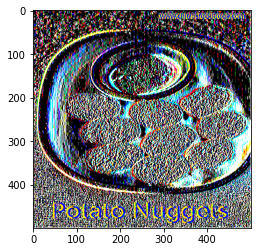

(500, 500, 3)

In [83]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  

i_transformed.shape

Streaming output truncated to the last 5000 lines.
pixels=[255.0, 255.0, 254.0, 239.0].  y= 242.  x=472. 
pixels=[66.0, 1.0, 62.0, 7.0].  y= 244.  x=472. 
pixels=[54.0, 5.0, 86.0, 16.0].  y= 246.  x=472. 
pixels=[97.0, 20.0, 83.0, 0.0].  y= 248.  x=472. 
pixels=[91.0, 31.0, 75.0, 4.0].  y= 250.  x=472. 
pixels=[78.0, 30.0, 69.0, 28.0].  y= 252.  x=472. 
pixels=[134.0, 18.0, 238.0, 101.0].  y= 254.  x=472. 
pixels=[255.0, 249.0, 255.0, 255.0].  y= 256.  x=472. 
pixels=[255.0, 246.0, 232.0, 255.0].  y= 258.  x=472. 
pixels=[141.0, 206.0, 51.0, 69.0].  y= 260.  x=472. 
pixels=[61.0, 5.0, 62.0, 43.0].  y= 262.  x=472. 
pixels=[81.0, 39.0, 73.0, 28.0].  y= 264.  x=472. 
pixels=[72.0, 3.0, 211.0, 199.0].  y= 266.  x=472. 
pixels=[250.0, 255.0, 250.0, 241.0].  y= 268.  x=472. 
pixels=[251.0, 255.0, 250.0, 255.0].  y= 270.  x=472. 
pixels=[87.0, 33.0, 75.0, 35.0].  y= 272.  x=472. 
pixels=[67.0, 32.0, 84.0, 47.0].  y= 274.  x=472. 
pixels=[66.0, 60.0, 66.0, 60.0].  y= 276.  x=472. 
pixels=[80.

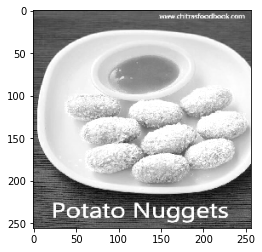

In [141]:
img = image.load_img("Potato-nuggets.jpg", target_size=(512, 512))

tmp_img = image.img_to_array(img)


print(tmp_img.shape)
x_img = tmp_img[:,:,0]

i_transformed = np.copy(x_img)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x)


from numpy import zeros, newaxis
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    print("pixels={}.  y= {}.  x={}. ".format(pixels,y,x))
    #myfunction2 = np.vectorize(max)
    pixels.sort(reverse=True)
    # Add a forth dimension since Keras expecta a list of images.
    #x = np.expand_dims(x, axis=0)
    #new = np.expand_dims(newImage[int(x/2),int(y/2)], axis=0)
    #new = newImage[int(x/2),int(y/2)]
    #np.reshape(new, (new[0],new[1],1))
    #b = new[:, :, newaxis]
    #new.reshape(1,1,1)
    #print("new={}.  y= {}.  x={}. ".format(new,y,x) )
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

(512, 512)
(512, 512, 3)
(262144, 3)
(3, 262144)
(512, 512)


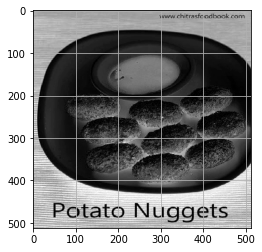

In [136]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()
print(i.shape)

print(x_img.shape)

#y = np.reshape(x_img, (x_img.shape[0],x_img.shape[1])) 

B = x_img.reshape(-1,x_img.shape[2])

print(B.shape)

E = x_img.transpose(2,0,1).reshape(x_img.shape[2],-1)

print(E.shape)

C= x_img[:,:,0]
print(C.shape)
 

import matplotlib.pyplot as plt
plt.grid(True)
#plt.gray()
#plt.axis('off')
plt.imshow(C,cmap=plt.cm.binary)
plt.show()

f the shape of your ndarray is (M, N, 3), then you can get an (M, N) gray-scale image like this:

>>> gray = img[:,:,0]